# Gathering data

Available
1. twitter_archive_enhanced.csv

Not-available
1. image_predictions.tsv 
2. tweet_json.txt

In [2]:
# Importing libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import tweepy 
import requests
import json 

from tqdm import *


In [3]:
# Reading the twitter_archive_enhanced.csv file into pandas DataFrame

df_archive = pd.read_csv("twitter-archive-enhanced.csv")
df_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Downloading .tsv file programmatically 


Provided url- 
https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv



In [3]:
# Download and Import 'image-predictions.tsv' file Programmatically

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Saveing the file
with open('image-predictions.tsv', "wb") as file: 
    file.write(response.content)
    
# Importing the .tsv file into pandas DataFrame
df_images = pd.read_table('image-predictions.tsv', sep="\t")
df_images.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


## Gathering data from Twitter API

Require
1. consumer_key
2. consumer_secret
3. access_token
4. access_secret
5. tweet_id

In [4]:
# Authenticating to twitter API 

consumer_key = 'igpgK21afImNywKLpEaPtFzZf'
consumer_secret = '10EnSyyuG31xXvPoDdD0OjAR9vbSKu147rBV6SsFldj2u5cw2N'
access_token = '2280151987-SlPXB71U9lDLdXvfkxu5I9OZ265w9dHTlj9cGVU'
access_secret = 'rLWGfCDYBL5hs5JZ8EMdMfh0VSC9LZPIayI5d6WPsDDjI'

'''
with open('AuthKey.txt', 'r') as file:
    consumer_key = file.readline()
    consumer_secret = file.readline()
    access_token = file.readline()
    access_secret = file.readline()
'''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [5]:
#api.get_status('891327558926688256')

In [6]:
# Fetching related data from twitter API using tweet_id

tweet_ids = list(df_archive.tweet_id)

tweet_data = {}
invalid_tweet_id = []

for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        invalid_tweet_id.append(tweet_ids)
        


In [7]:
# Converting text data to json


import json

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(tweet_data, indent=4))
    


In [8]:
# Reading tweet_json.txt file into pandas DataFrame

tweet_df = pd.read_json('tweet_json.txt',orient='index')

tweet_df.head(2)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2562,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,516,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",129,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [9]:
# Copying the dataframes inorder to process

df_clean = df_archive.copy()
images_clean = df_images.copy()
tweet_df_clean = tweet_df.copy()

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2340 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2340 non-null datetime64[ns]
entities                         2340 non-null object
extended_entities                1821 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null int64
geo                              0 non-null float64
id                               2340 non-null int64
id_str                           2340 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

In [13]:
df_clean.index, images_clean.index, tweet_df_clean.index

(RangeIndex(start=0, stop=2356, step=1),
 RangeIndex(start=0, stop=2075, step=1),
 DatetimeIndex(['1991-02-08 13:48:08.022790149',
                '1991-02-08 16:08:05.002620928',
                '1991-02-08 17:16:52.701032449',
                '1991-02-08 20:17:06.329800704',
                '1991-02-08 21:40:48.165822465',
                '1991-02-08 22:05:58.794694657',
                '1991-02-08 22:24:13.826850816',
                '1991-02-08 23:25:25.042405380',
                '1991-02-08 23:51:30.499244032',
                '1991-02-09 00:16:40.524156928',
                ...
                '1998-03-18 16:57:35.349198849',
                '1998-03-22 23:26:25.150312448',
                '1998-03-24 08:46:21.411237888',
                '1998-03-27 04:11:53.173991426',
                '1998-03-28 12:25:50.875897856',
                '1998-03-31 06:59:18.926688256',
                '1998-04-04 11:32:37.279858688',
                '1998-04-05 22:26:21.378084864',
                

In [14]:
df_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
df_clean[df_clean.duplicated()==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [16]:
images_clean[images_clean.duplicated()==True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Assessing data

### Quality issues

1. Could not fetch data from Twitter API for some tweet_ids
2. Type of 'timestamp' column in df_clean is Object instead of timestamp
3. Possible incorrect data in 'name' column like- 'a', 'the', 'this'
4. 'numerator' and 'denominator' columns have some unusual values
5. column name 'id' in tweet_df_clean DataFrame should be changed to 'tweet_id' in-order to merge with other DataFrame
6. Missing values in images_clean DataFrame (2075 rows instead of 2356)
7. We have null values in various column
8. Type of Various column like in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id in tweet_df_clean DataFrame is Float instead of Int
9. Some tweet_ids does not actually contain a picture of dog like- (666052000000000000,666412000000000000)
10. Calculate rating based on 'numerator' and 'denominator'


### Tidiness issues

1. Various unwanted columns in df_clean, and tweet_df_clean DataFrame
2. We can have one column 'dog_stage' instead of doggo floofer pupper and puppo 
3. df_clean, images_clean and tweet_df_clean should be merged to one DataFrame



## Define Steps and Cleaning data

1. Convert column 'timestamp' from Object to timestamp
2. Rename all possible incorrect name to NaN
3. Rename column 'id' to 'tweet_id'
4. Drop all unwanted column from all 3 DataFrame
5. Create one column 'dog_stage' instead of doggo floofer pupper and puppo
6. Create column 'rating' to calculate rating based on 'numerator' and 'denominator'
7. Merge all 3 DataFrame

In [17]:
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Define Steps 1

1. Convert column 'timestamp' from Object to timestamp
2. Create a new column based on date

In [18]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

df_clean['date'] = df_clean['timestamp'].dt.date
#df_clean['time'] = df_clean['timestamp'].dt.time

### Test

In [19]:
df_clean.timestamp.dtype

dtype('<M8[ns]')

In [20]:
df_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01


### Define Steps 2

 2. Rename all possible incorrect name to NaN

In [21]:
df_clean.name.replace(to_replace = ['a','all','an','by','his','my','just','this','the'], value=None, inplace=True)

In [22]:
df_clean[df_clean.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date


In [23]:
df_clean[df_clean.name == 'my']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date


### Define Steps 3

3. Rename column 'id' to 'tweet_id'

In [24]:
tweet_df_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

### Test

In [25]:
tweet_df_clean.head(1)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,tweet_id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2562,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,516,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Define Steps 4

4. Drop all unwanted column from all 3 DataFrame

In [26]:
df_clean.drop(['timestamp','in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace = True)

In [27]:
tweet_df_clean.drop(['contributors','coordinates','extended_entities','favorited','geo','id_str','in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','is_quote_status','place','possibly_sensitive','possibly_sensitive_appealable','quoted_status','quoted_status_id','quoted_status_id_str','retweeted','retweeted_status','truncated','user'], axis=1, inplace = True)

### Test

In [28]:
list(df_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'date']

In [29]:
list(images_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [30]:
list(tweet_df_clean)

['created_at',
 'entities',
 'favorite_count',
 'tweet_id',
 'lang',
 'retweet_count',
 'source',
 'text']

### Define Steps 5

5. Create one column 'dog_stage' instead of doggo floofer pupper and puppo

In [31]:
columns_to_melt = ['doggo', 'floofer', 'pupper', 'puppo']
columns_to_stay = [x for x in df_clean.columns.tolist() if x not in columns_to_melt]

# Mlet the the columns into values
df_clean = pd.melt(df_clean, id_vars = columns_to_stay, value_vars = columns_to_melt, 
                         var_name = 'stages', value_name = 'dog_stage')

df_clean.drop(['stages'], axis=1, inplace=True)

### Test

In [32]:
list(df_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'date',
 'dog_stage']

In [33]:
df_clean.dog_stage.value_counts()

None       9030
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_stage, dtype: int64

In [34]:
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

## Define Steps 6

1. Create column 'rating' to calculate rating based on 'numerator' and 'denominator'

In [35]:
df_clean['rating'] = df_clean['rating_numerator'] / df_clean['rating_denominator']

## Test

In [36]:
df_clean.head(1)

,tweet_id,text,rating_numerator,rating_denominator,name,date,dog_stage,rating
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,2017-08-01,None,1.3


### Define Steps 7

6. Merge all 3 DataFrame

In [37]:
df_all = pd.merge(df_clean, images_clean, how='inner')
df_master = pd.merge(df_all, tweet_df_clean, how='inner')

In [38]:
# Saving the final DataFrame
df_master.drop(['img_num', 'created_at', 'entities', 'lang', 'source','rating_numerator', 'rating_denominator'], axis=1, inplace=True)

### Test

In [39]:
df_master.head(2)

,tweet_id,text,name,date,dog_stage,rating,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,2017-07-30,None,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42063,8678
1,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,2017-07-30,None,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42063,8678


In [40]:
list(df_master)

['tweet_id',
 'text',
 'name',
 'date',
 'dog_stage',
 'rating',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorite_count',
 'retweet_count']

In [41]:
# Change the order (the index)
column_names = ['tweet_id','date','name','rating','favorite_count','retweet_count','dog_stage','text',
                'jpg_url','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']

df_master = df_master.reindex(columns=column_names)

In [42]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4820 entries, 0 to 4819
Data columns (total 18 columns):
tweet_id          4820 non-null int64
date              4820 non-null object
name              4820 non-null object
rating            4820 non-null float64
favorite_count    4820 non-null int64
retweet_count     4820 non-null int64
dog_stage         4820 non-null object
text              4820 non-null object
jpg_url           4820 non-null object
p1                4820 non-null object
p1_conf           4820 non-null float64
p1_dog            4820 non-null bool
p2                4820 non-null object
p2_conf           4820 non-null float64
p2_dog            4820 non-null bool
p3                4820 non-null object
p3_conf           4820 non-null float64
p3_dog            4820 non-null bool
dtypes: bool(3), float64(4), int64(3), object(8)
memory usage: 616.6+ KB


In [43]:
df_master.head(2)

,tweet_id,date,name,rating,favorite_count,retweet_count,dog_stage,text,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891689557279858688,2017-07-30,Darla,1.3,42063,8678,None,This is Darla. She commenced a snooze mid meal...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
1,891689557279858688,2017-07-30,Darla,1.3,42063,8678,None,This is Darla. She commenced a snooze mid meal...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [44]:
df_master[df_master.duplicated()==True].count()[1]

3421

In [45]:
df_master.drop_duplicates(keep='first', inplace=True)

In [46]:
df_master[df_master.duplicated()==True].count()[1]

0

In [47]:
df_master.head(2)

,tweet_id,date,name,rating,favorite_count,retweet_count,dog_stage,text,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891689557279858688,2017-07-30,Darla,1.3,42063,8678,None,This is Darla. She commenced a snooze mid meal...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,889638837579907072,2017-07-25,Ted,1.2,27101,4564,None,This is Ted. He does his best. Sometimes that'...,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True


In [48]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 0 to 4816
Data columns (total 18 columns):
tweet_id          1399 non-null int64
date              1399 non-null object
name              1399 non-null object
rating            1399 non-null float64
favorite_count    1399 non-null int64
retweet_count     1399 non-null int64
dog_stage         1399 non-null object
text              1399 non-null object
jpg_url           1399 non-null object
p1                1399 non-null object
p1_conf           1399 non-null float64
p1_dog            1399 non-null bool
p2                1399 non-null object
p2_conf           1399 non-null float64
p2_dog            1399 non-null bool
p3                1399 non-null object
p3_conf           1399 non-null float64
p3_dog            1399 non-null bool
dtypes: bool(3), float64(4), int64(3), object(8)
memory usage: 179.0+ KB


In [49]:
list(df_master)

['tweet_id',
 'date',
 'name',
 'rating',
 'favorite_count',
 'retweet_count',
 'dog_stage',
 'text',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [50]:
df_master.dog_stage.value_counts()

None       1205
pupper      146
doggo        34
puppo        10
floofer       4
Name: dog_stage, dtype: int64

In [51]:
#df_clean[df_clean.tweet_id.duplicated()==True]

In [52]:
#df_archive['tweet_id'].value_counts()

In [53]:
df_master.to_csv('df_master.csv')

In [4]:
df_master = pd.read_csv('df_master.csv')

## analyzing, and visualizing

In [5]:
list(df_master)

['Unnamed: 0',
 'tweet_id',
 'date',
 'name',
 'rating',
 'favorite_count',
 'retweet_count',
 'dog_stage',
 'text',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

### Most popular dog_stages 

In [8]:
favorite_dog_stage = df_master['dog_stage'].value_counts()[1:]

Text(0,0.5,'Count')

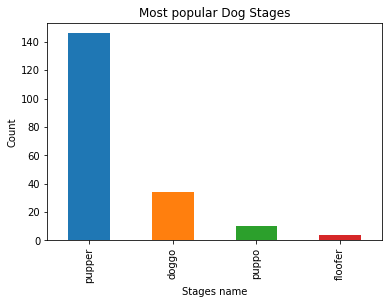

In [9]:
favorite_dog_stage.plot(kind='bar', figsize=(6, 4))

plt.title('Most popular Dog Stages')
plt.xlabel('Stages name')
plt.ylabel('Count')


In [57]:
list(df_master)

['tweet_id',
 'date',
 'name',
 'rating',
 'favorite_count',
 'retweet_count',
 'dog_stage',
 'text',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

## Correlation between favorite_count and retweet_count based on time

In [58]:
df_master.set_index('date', inplace=True)

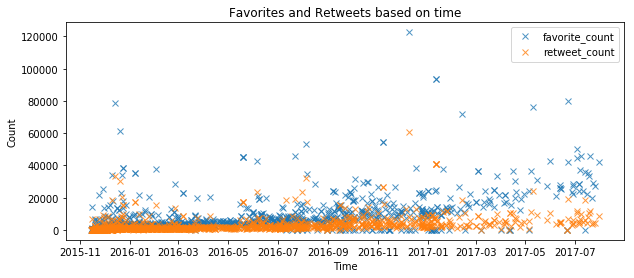

In [59]:
df_master[['favorite_count', 'retweet_count']].plot(style = 'x', alpha = 1.8, figsize=(10, 4))

plt.title('Favorites and Retweets based on time')
plt.xlabel('Time')
plt.ylabel('Count');

In [60]:
df_master[['favorite_count', 'retweet_count', 'rating']].corr(method='pearson')

,favorite_count,retweet_count,rating
favorite_count,1.000000,0.791124,0.023180
retweet_count,0.791124,1.000000,0.024069
rating,0.023180,0.024069,1.000000


There is a strong correlation between favorite_count and retweet_count but there is no correlation between rating and retweet_count or rating and favorite_count. 

### Most Popular Dog based on favorite_count, retweet_count and rating

In [38]:
favorite_popular_dog = df_master.loc[df_master['favorite_count'] == df_master.favorite_count.max()]
favorite_popular_dog

,Unnamed: 0,tweet_id,date,name,rating,favorite_count,retweet_count,dog_stage,text,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
152,516,807106840509214720,2016-12-09,Stephan,1.3,122636,60873,None,This is Stephan. He just wants to help. 13/10 ...,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua,0.50537,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True


In [39]:
retweet_popular_dog = df_master.loc[df_master['retweet_count'] == df_master.retweet_count.max()]
retweet_popular_dog

,Unnamed: 0,tweet_id,date,name,rating,favorite_count,retweet_count,dog_stage,text,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
152,516,807106840509214720,2016-12-09,Stephan,1.3,122636,60873,None,This is Stephan. He just wants to help. 13/10 ...,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua,0.50537,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True


In [40]:
rating_popular_dog = df_master.loc[df_master['rating'] == df_master.rating.max()]
rating_popular_dog

,Unnamed: 0,tweet_id,date,name,rating,favorite_count,retweet_count,dog_stage,text,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
418,1420,749981277374128128,2016-07-04,Atticus,177.6,5499,2700,None,This is Atticus. He's quite simply America af....,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False


## Top 10 Dog Breed

Text(0.5,0,'Count')

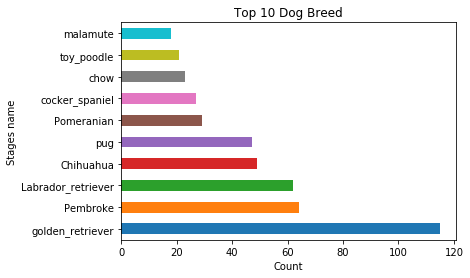

In [61]:
b = df_master.p1.value_counts()[:10]

b.plot(kind='barh', figsize=(6, 4))

plt.title('Top 10 Dog Breed')
plt.ylabel('Stages name')
plt.xlabel('Count')